<a href="https://colab.research.google.com/github/eduardonsm/ImersaoDados/blob/main/Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
dados = pd.read_csv(fonte)
dados['NU_IDADE'].value_counts(normalize=True)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
        ...   
75    0.000016
73    0.000016
82    0.000008
77    0.000008
76    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

In [ ]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)
#aqui estamos analisando inscritos de 14 anos ou menos, em conjuntos com o estado 

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
SP    0.075862
MG    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
MT    0.027586
AM    0.027586
DF    0.027586
PR    0.020690
TO    0.020690
SE    0.020690
RO    0.013793
SC    0.013793
AL    0.013793
MS    0.006897
RS    0.006897
RN    0.006897
ES    0.006897
AC    0.006897
AP    0.006897
RJ    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

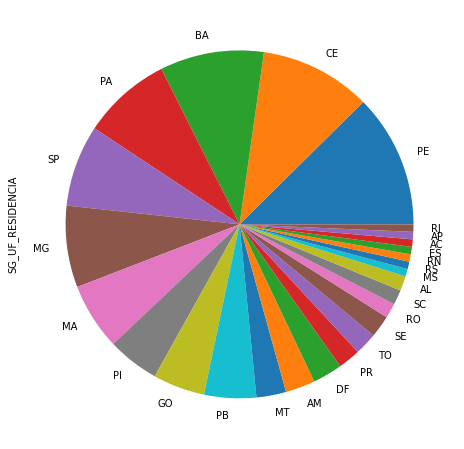

In [ ]:
alunos_menor_quartoze = dados.query("NU_IDADE <= 14")
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))

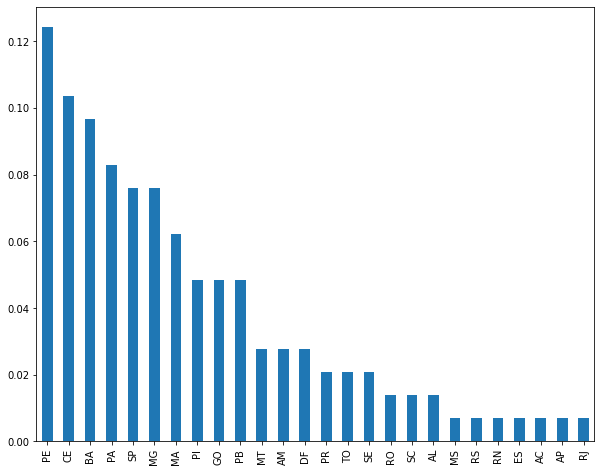

In [ ]:
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8))

**Desafio 01: aumentar a amostra para alunos menor de idade e comparar a proporção por estado.**

[Text(0.5, 1.0, 'Porcentagem dos alunos menores de idade')]

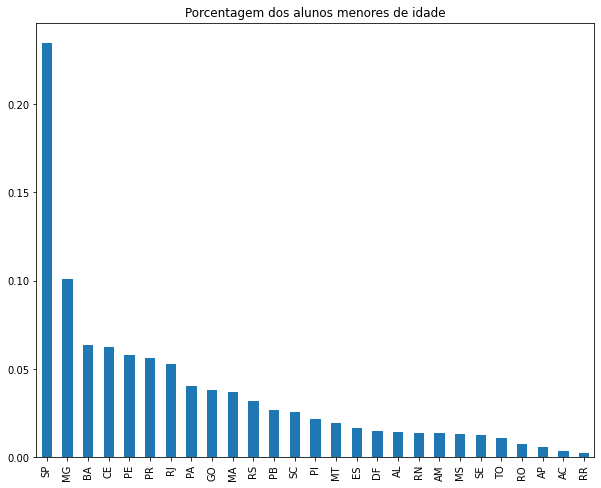

In [ ]:
alunos_menor_idade = dados.query("NU_IDADE < 18")
alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8)).set(title = 'Porcentagem dos alunos menores de idade')


Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

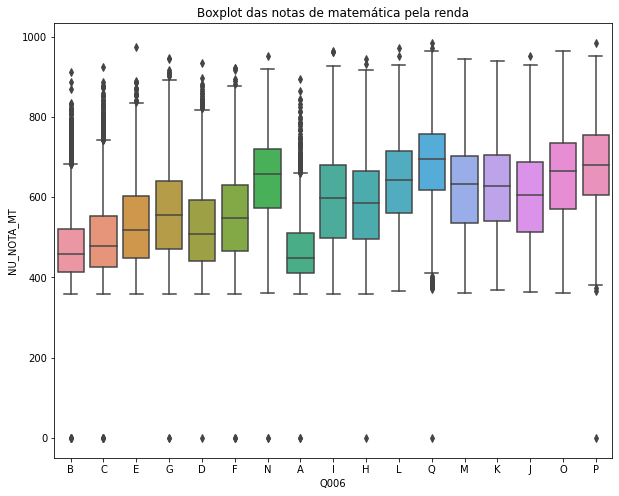

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados)
plt.title("Boxplot das notas de matemática pela renda")

In [ ]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()


Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

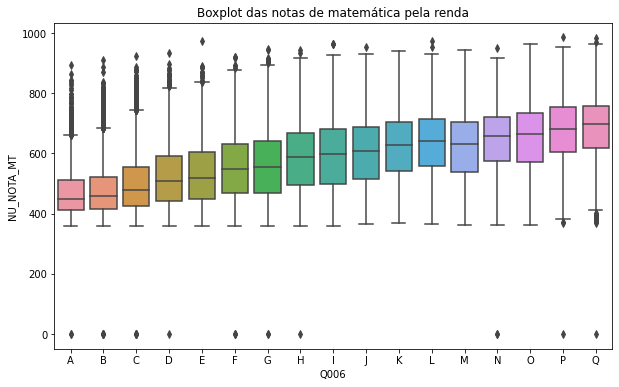

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados[provas].sum(axis=1)

0         2288.9
1         1184.6
2         2350.5
3         2555.7
4         2803.5
           ...  
127375    2867.4
127376    2218.5
127377    1453.9
127378    2573.9
127379    2287.8
Length: 127380, dtype: float64

In [ ]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

Text(0.5, 1.0, 'Boxplot das notas pela renda')

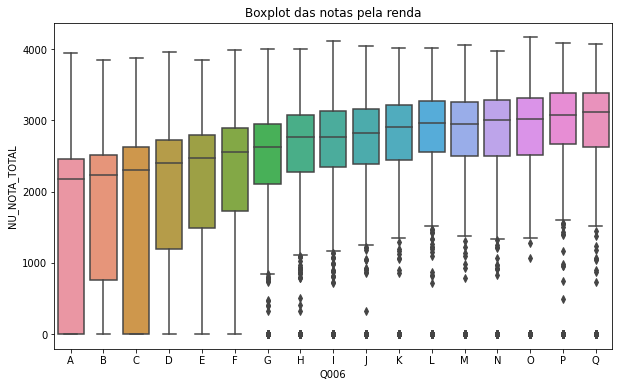

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas pela renda")

**Desafio 02 - Criar uma função para plotar o boxplot do seaborn**

In [ ]:
def funcaoplot (param):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x="Q006", y = param , data = dados, order = renda_ordenada)
  plt.title("Boxplot das notas pela renda")

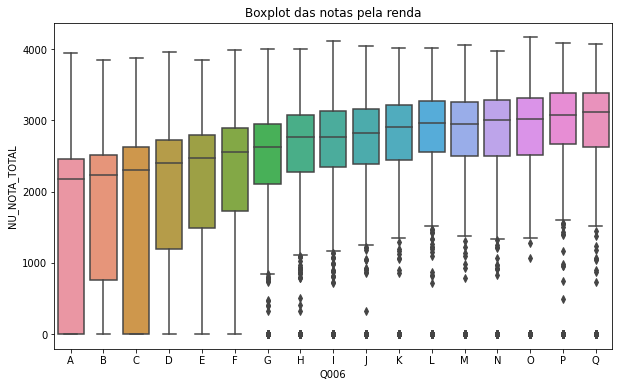

In [ ]:
funcaoplot("NU_NOTA_TOTAL")

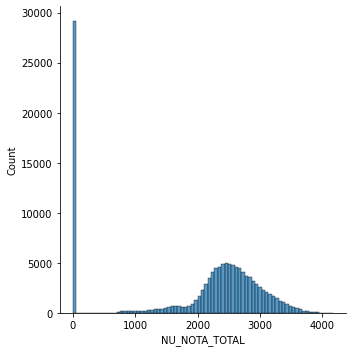

In [ ]:
sns.displot(dados, x ="NU_NOTA_TOTAL")

In [ ]:
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


**Desafio 03 - Verificar se quem zerou a prova foi eliminado ou não estava presente**



In [ ]:
presenca_provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO", 
                   "NU_NOTA_TOTAL", "TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_MT", "TP_PRESENCA_LC"]
dados[presenca_provas].query("NU_NOTA_MT == 'NaN' and TP_PRESENCA_MT == 2").head()
#Quem foi eliminado não tem registro da nota (NaN)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC
1784,NaN,323.4,NaN,485.0,680.0,1488.4,2,1,2,1
2867,NaN,466.6,NaN,526.6,480.0,1473.2,2,1,2,1
3411,NaN,502.7,NaN,484.9,340.0,1327.6,2,1,2,1
5970,NaN,448.6,NaN,471.8,360.0,1280.4,2,1,2,1
15619,NaN,618.7,NaN,620.7,800.0,2039.4,2,1,2,1


In [ ]:
dados[presenca_provas].query("NU_NOTA_MT == 'NaN' and TP_PRESENCA_MT == 0").head()
# Quem não foi fazer a prova também tirou NaN

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC
1,NaN,409.3,NaN,375.3,400.0,1184.6,0,1,0,1
10,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0
11,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0
26,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0
38,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0


In [ ]:
dados[presenca_provas].query("NU_NOTA_MT == 0 and TP_PRESENCA_MT == 1").head()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC
4923,373.4,0.0,0.0,418.5,320.0,1111.9,1,1,1,1
6437,0.0,347.7,0.0,398.7,380.0,1126.4,1,1,1,1
7076,0.0,315.9,0.0,419.5,0.0,735.4,1,1,1,1
8693,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
12954,473.5,0.0,0.0,395.9,460.0,1329.4,1,1,1,1


In [ ]:
dados[presenca_provas].query("NU_NOTA_MT == 0 and TP_PRESENCA_MT == 2").head()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC


In [ ]:
dados[presenca_provas].query("NU_NOTA_MT == 0 and TP_PRESENCA_MT == 0").head()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC


In [ ]:
#Com esses resultados, podemos perceber que as pessoas que tiraram 0, são pessoas que estavam presentes

**Desafio 04 - Quem é eliminado tira zero ou será NaN (não teve registro de notas)**

In [ ]:
dados[presenca_provas].query("TP_PRESENCA_MT == 2").head()
#Quem é eliminado, que é TP_PRESENCA_X == 2, tira NaN

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC
1784,NaN,323.4,NaN,485.0,680.0,1488.4,2,1,2,1
2867,NaN,466.6,NaN,526.6,480.0,1473.2,2,1,2,1
3411,NaN,502.7,NaN,484.9,340.0,1327.6,2,1,2,1
5970,NaN,448.6,NaN,471.8,360.0,1280.4,2,1,2,1
15619,NaN,618.7,NaN,620.7,800.0,2039.4,2,1,2,1


In [ ]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9c12bd6d8>,
      dtype=object)

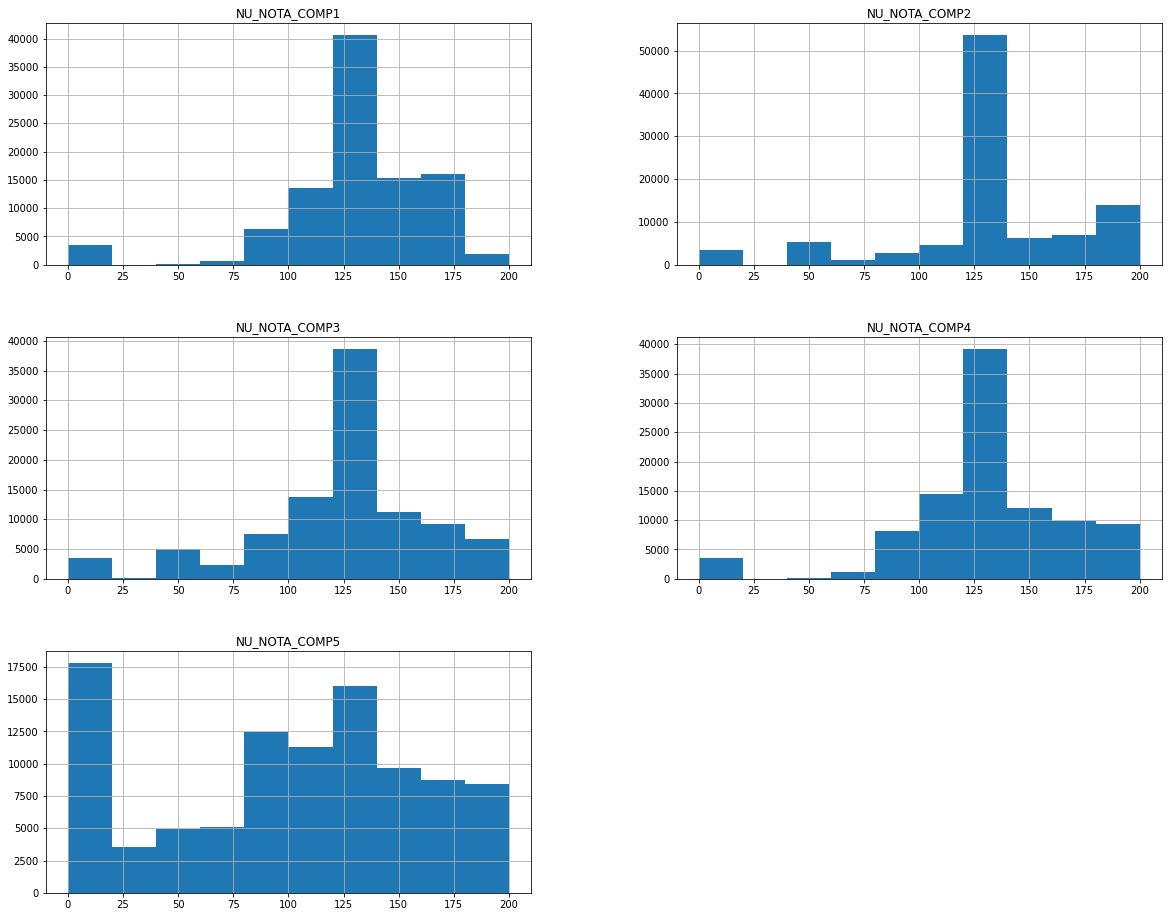

In [ ]:
notas_redacao = dados[["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]]
notas_redacao.hist(bins = 10, figsize=(20,16))

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

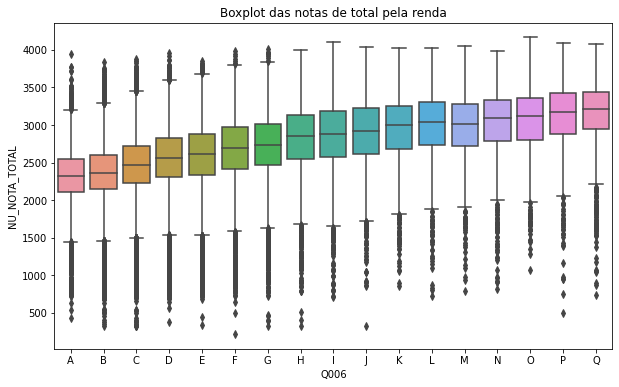

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

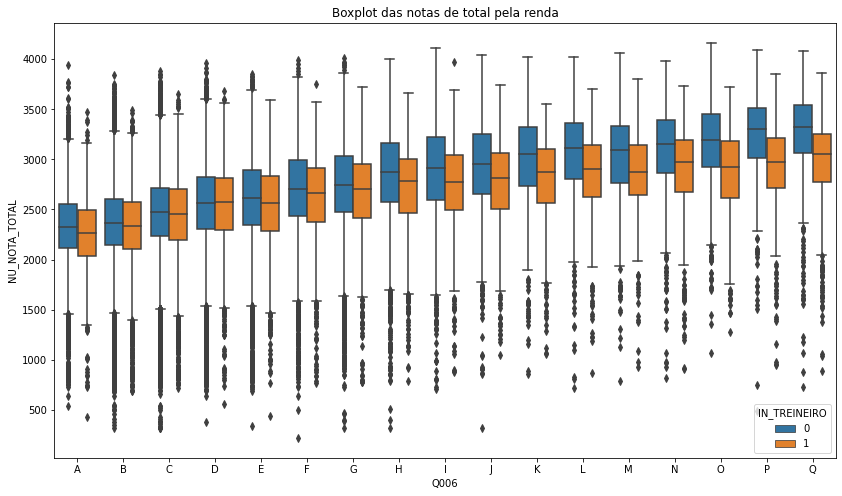

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

**Desafio 05 - Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.**

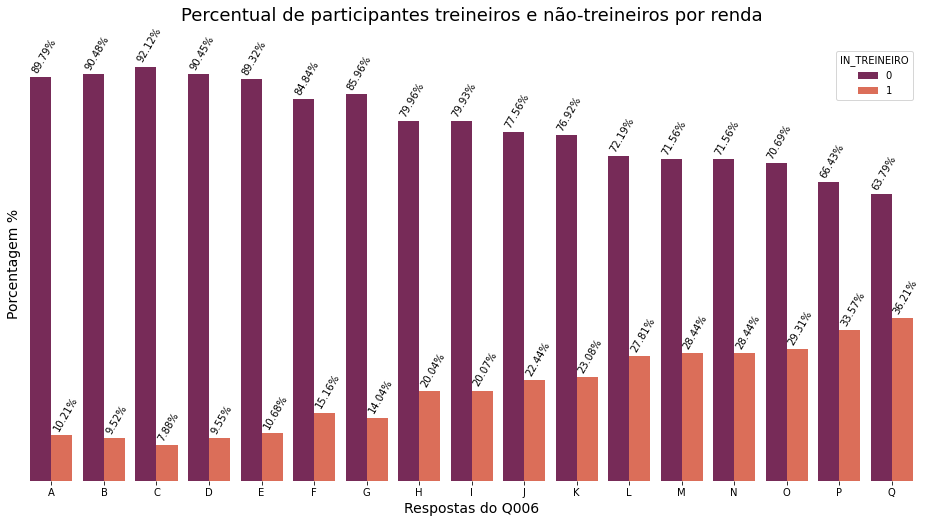

In [ ]:
desafio5=(dados.groupby('Q006')['IN_TREINEIRO']
          .value_counts(normalize=True).rename('porcentagem')
          .mul(100).reset_index().sort_values('Q006'))

plt.figure(figsize=(16,8))
#Plotando gráfico
ax=sns.barplot(x='Q006',y='porcentagem', data=desafio5,hue="IN_TREINEIRO",palette='rocket')

#Colocando Titulo e Etiquetas nos eixos
ax.set_title('Percentual de participantes treineiros e não-treineiros por renda',fontsize=18,pad=25)
ax.set_ylabel('Porcentagem %',fontsize=14)
ax.set_xlabel('Respostas do Q006',fontsize=14)

#Colocando as porcentagens em cima das barras
for p in ax.patches:
    percentage = '{:.2f}%'.format(p.get_height())
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y+1), rotation=60)

#Retirando as "molduras"/Spines e os Ticks
sns.despine(left=True,bottom=True)
ax.tick_params(which='both',left=False,labelleft=False)

plt.show()

**Desafio 06 - Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.**

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

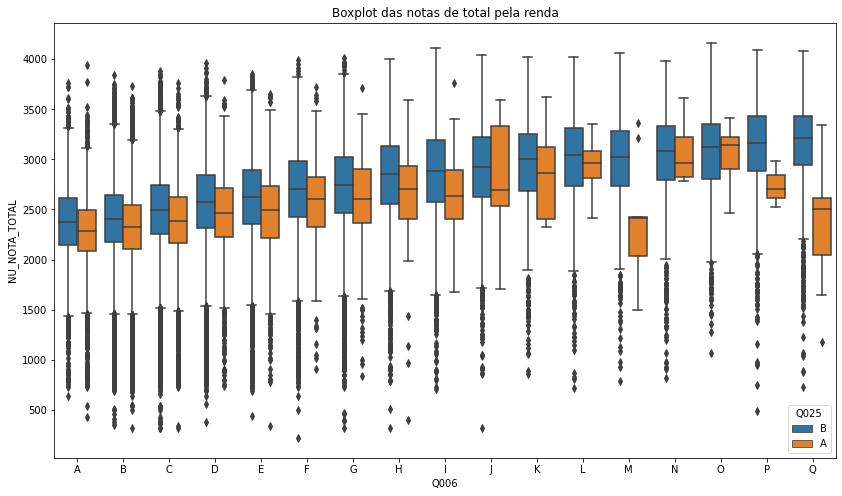

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", hue = 'Q025',data = dados_sem_notas_zero, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

As notas estão levemente superiores para os inscritos com internet, porém esses dados são de 2019. Agora em 2020, com a pandemia a internet é fundamental para um melhor aproveitamento.